In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
# Read all filenames inside picked_uiuc folder
start = f'{os.getcwd()}\\picked_uiuc'
namelist = []
num_points = int(201)
coord_data = np.empty((1,num_points))

for file in os.listdir(start):
    namelist.append(file)
    temp_df = pd.read_csv(f'{start}\\{file}', header=None, delimiter='\s+')
    coord_data = np.append(coord_data, temp_df[1].values.reshape(1,-1), axis=0)

coord_data = coord_data[1:]  
points_per_surface = int(round(num_points/2))-1
column_tags = []
column_tags.append('TE1')
for i in range(1, points_per_surface+1):
    column_tags.append(f'yU_{i}')
column_tags.append('LE')
for i in range(1, points_per_surface+1):
    column_tags.append(f'yL_{i}')
column_tags.append('TE2')

# Create dataframe with airfoil data and drop unnecessary coordinate columns
airfoil_df = pd.DataFrame(coord_data, columns=column_tags)
airfoil_df = airfoil_df.drop(labels=['TE1', 'TE2', 'LE'], axis=1)

In [3]:
# Show dataframe
airfoil_df.head()

,yU_1,yU_2,yU_3,yU_4,yU_5,yU_6,yU_7,yU_8,yU_9,yU_10,...,yL_90,yL_91,yL_92,yL_93,yL_94,yL_95,yL_96,yL_97,yL_98,yL_99
0,0.000052,0.000207,0.000466,0.000828,0.001293,0.001860,0.002528,0.003298,0.004166,0.005133,...,0.002838,0.002308,0.001830,0.001406,0.001036,0.000721,0.000462,0.000261,0.000116,0.000029
1,0.000059,0.000235,0.000529,0.000938,0.001461,0.002096,0.002840,0.003691,0.004645,0.005697,...,0.001694,0.001380,0.001096,0.000843,0.000622,0.000433,0.000278,0.000157,0.000070,0.000017
2,0.000051,0.000204,0.000462,0.000829,0.001308,0.001905,0.002625,0.003470,0.004443,0.005543,...,0.001289,0.001060,0.000852,0.000664,0.000497,0.000351,0.000228,0.000130,0.000058,0.000015
3,0.000026,0.000105,0.000236,0.000420,0.000656,0.000943,0.001282,0.001669,0.002104,0.002581,...,-0.000372,-0.000303,-0.000240,-0.000185,-0.000137,-0.000096,-0.000062,-0.000035,-0.000016,-0.000004
4,0.000024,0.000095,0.000213,0.000380,0.000593,0.000854,0.001162,0.001514,0.001910,0.002347,...,-0.000223,-0.000178,-0.000138,-0.000103,-0.000073,-0.000050,-0.000031,-0.000017,-0.000007,-0.000002


In [6]:
# Save dataframe
airfoil_df.to_csv(f'./datasets/UIUC_dataset_{num_points-3}p.csv', index = False)

In [111]:
def airfoil_plot(airfoil_coords, fig=None, label=None, spacing='cosine', n_points=30):
    """
    Returns a plot of an airfoil. Used to visualize output of the optimizer. 
    Assumes 15 points for upper surface and 15 points for lower surface, with cosine spacing.
    Inputs:
        - airfoil_coords: pandas DataFrame with airfoil coordinates and other parameters
    Outputs:
        - Plot of airfoil shape
    """
    if fig==None:
        fig = plt.subplot2grid((1,3), (0,0), colspan = 3)
    
    # X coordinates
    points_per_surf = int(n_points/2)
    if spacing == 'cosine':
        x = [0.5*(1-np.cos(ang)) for ang in np.linspace(0,np.pi,points_per_surf+2)]
        aux_x = list(reversed([0.5*(1-np.cos(ang)) for ang in np.linspace(0,np.pi,points_per_surf+2)[1:points_per_surf+1]]))
        [x.append(i) for i in aux_x]
        x.append(0)
    elif spacing == 'linear':
        x = list(np.linspace(0,1,points_per_surf+2))
        aux_x = list(reversed(list(np.linspace(0,1,points_per_surf+2)[1:points_per_surf+1])))
        [x.append(i) for i in aux_x]
        x.append(0)    
        
    # Y coordinates
    y = []
    origin = (airfoil_coords.iloc[0]+airfoil_coords.iloc[points_per_surf])/2
    y.append(origin)
    [y.append(j) for j in airfoil_coords.iloc[0:points_per_surf].values.tolist()]
    y.append(0)
    #aux_y = list(reversed(airfoil_coords.iloc[points_per_surf:n_points].values.tolist()))
    aux_y = list(airfoil_coords.iloc[points_per_surf:n_points].values.tolist())
    [y.append(k) for k in aux_y]
    y.append(origin)

    # Airfoil plot     
    fig.plot(x, y, label = label)
    fig.set_xlim([-0.1,1.1])
    fig.set_ylim([-0.2,0.3])
    fig.set_ylabel('$y/c$')
    fig.set_xlabel('$x/c$') 
    fig.set_title('Airfoil plot', fontsize=16)
    fig.legend()
    if fig==None:
        plt.show()
    return

In [25]:
airf = airfoil_df.iloc[idx][:]
airf.iloc[0]

3.004118176e-05

------ Random airfoil ------


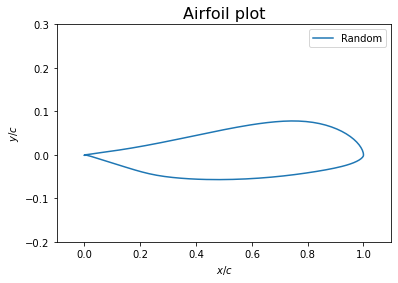

In [116]:
# Plot a random airfoil
idx = np.random.randint(0, len(airfoil_df))
num_coords = int(num_points-3)
plot1 = plt.subplot2grid((1,3), (0,0), colspan = 3)
print("------ Random airfoil ------")
airfoil_plot(airfoil_df.iloc[idx][:], fig=plot1, label="Random", n_points=num_coords, spacing='cosine')
plt.show()